# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import SARIMAX

from functions import monthly, plot_acf_pacf, plot_preds

warnings.filterwarnings('ignore')

In [2]:
# Read in the data
unemp = pd.read_csv('materials/unemp_cleaned.csv')
unemp.index = pd.to_datetime(unemp['week_filed'])
unemp.drop('week_filed', axis=1, inplace=True)

construction_county = pd.read_csv('materials/construction_county_cleaned.csv')
construction_county.index = pd.to_datetime(construction_county['Unnamed: 0'])
construction_county.drop('Unnamed: 0', axis=1, inplace=True)

# Weekly Unemployment - Initial Claims (Statewide)

In [3]:
# Divide data into pre-Harvey and post-Harvey timeframes
pre_harvey = unemp['initial_claims'][:887]
post_harvey = unemp['initial_claims'][886:]

First we wanted to plot the autocorrelation and partial autocorrelation functions to examine the degree of autocorrelation in the variable over time.

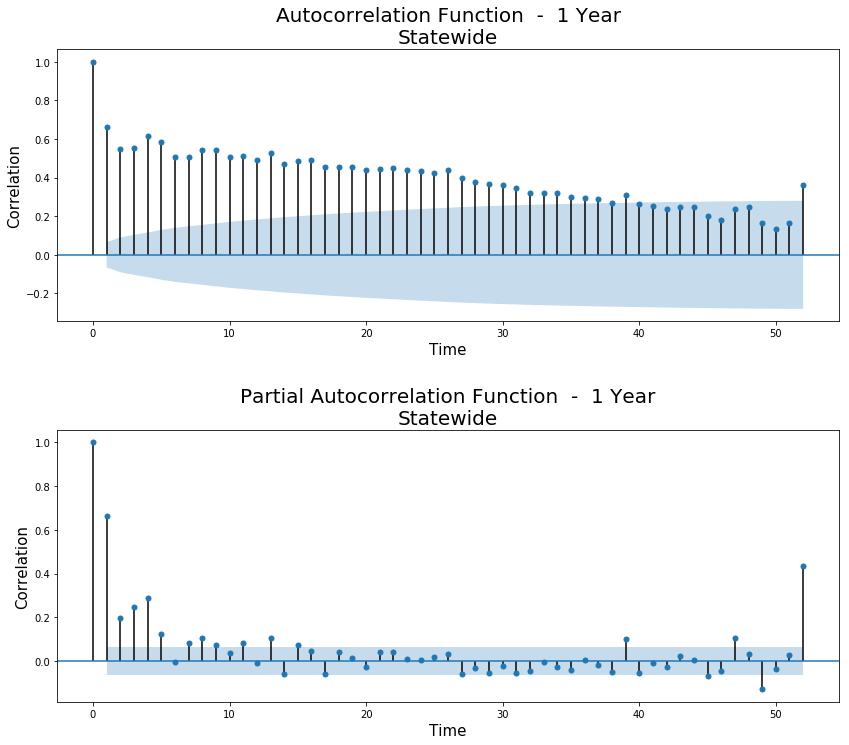

In [4]:
plot_acf_pacf(pre_harvey, 52, '1 Year', 'Statewide')

## Seasonal ARIMA Model

In [5]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(unemp['initial_claims'][:887]))

Test Statistic   -2.760245
p-value           0.064181
dtype: float64

In [6]:
# Iterate through all possible differences.
for d in range(1, len(unemp['initial_claims'])):
    if interpret_dftest(adfuller(unemp['initial_claims'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=1 yields a stationary time series


In [7]:
# SARIMA model to predict post-Harvey unemployment initial claims
model = SARIMAX(pre_harvey,
                order=(1,1,0),
                seasonal_order=(1, 1, 1, 52))
sarima = model.fit()
preds_post_harvey = sarima.predict('2016', '2019')

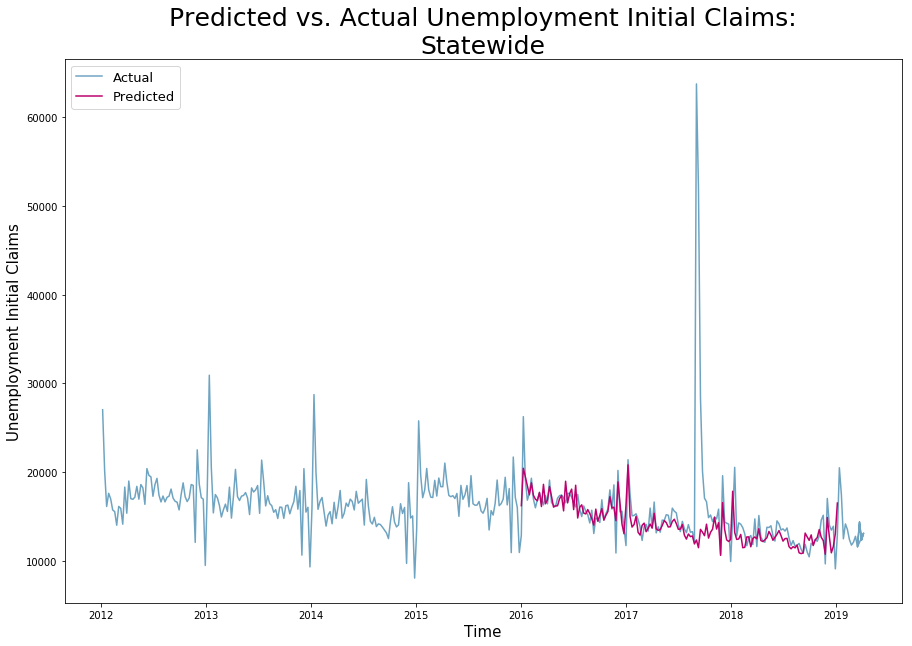

In [8]:
plot_preds(unemp['2012':'2020'][['initial_claims']], preds_post_harvey, 
           'Statewide', 'Unemployment Initial Claims');

# Construction Employment by County (Monthly)

In [9]:
harris = monthly(construction_county, 'harris')
jefferson = monthly(construction_county, 'jefferson')
orange = monthly(construction_county, 'orange')

## Harris County

In [10]:
# Divide dataframe into pre and post Harvey
pre_harris = harris['2001':'2015']
post_harris = harris['2016':]

In [11]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(pre_harris['employment']))

Test Statistic   -3.480196
p-value           0.008511
dtype: float64

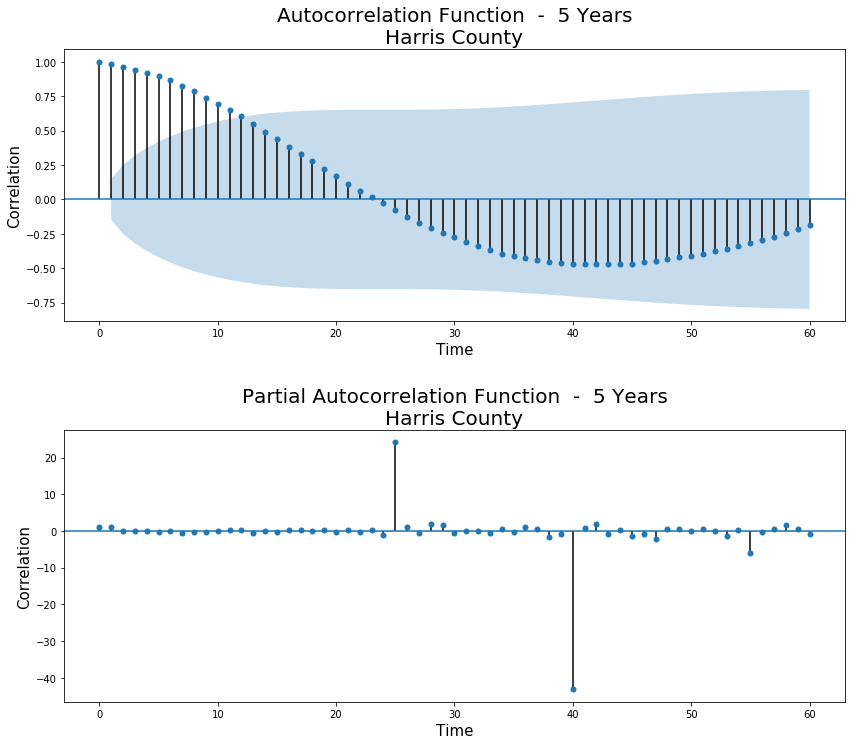

In [12]:
plot_acf_pacf(pre_harris, 60, '5 Years', 'Harris County')

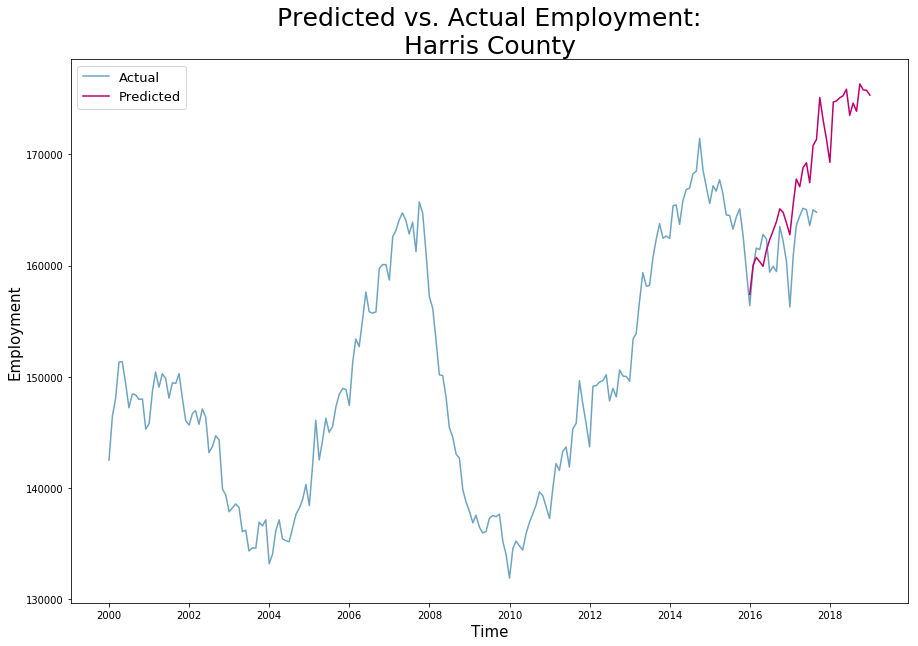

In [13]:
# Running an ARIMA model to predict post-Harvey employment
model = SARIMAX(pre_harris,
                order=(1,1,0),
               seasonal_order=(1,1,0,72))
sarima = model.fit()
preds_post_harris = sarima.predict(start='2016', end='2019')

plot_preds(harris, preds_post_harris, 'Harris County', 'Employment')

## Jefferson County

In [14]:
# Divide dataframe into pre and post Harvey
pre_jefferson = jefferson['2001':'2015']
post_jefferson = jefferson['2016':]

In [15]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(pre_jefferson['employment']))

Test Statistic   -1.733554
p-value           0.413913
dtype: float64

In [16]:
# Iterate through all possible differences.
for d in range(1, len(pre_jefferson['employment'])):
    if interpret_dftest(adfuller(pre_jefferson['employment'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=1 yields a stationary time series


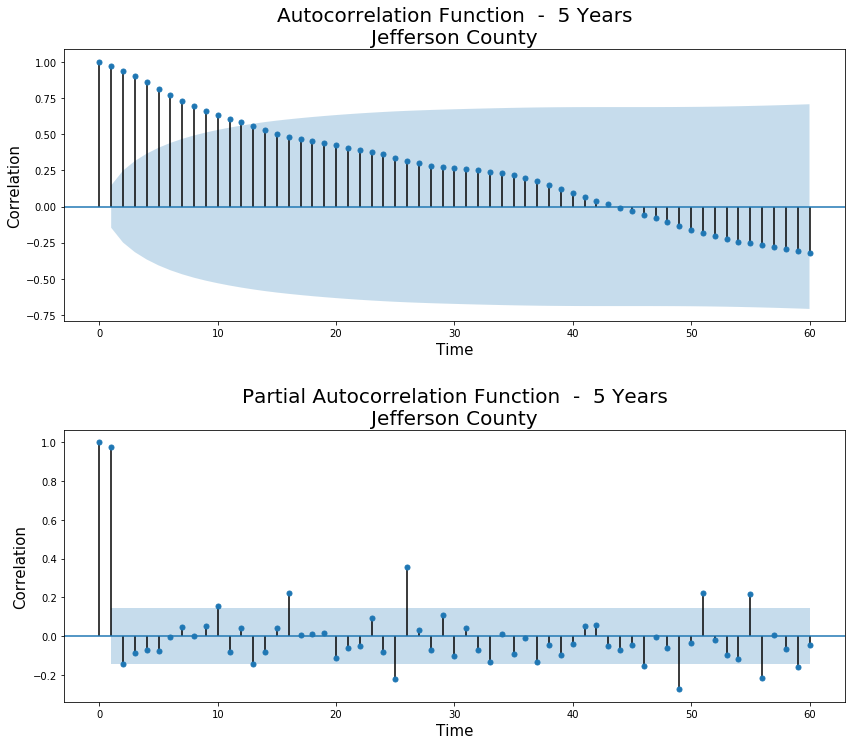

In [17]:
plot_acf_pacf(pre_jefferson, 60, '5 Years', 'Jefferson County')

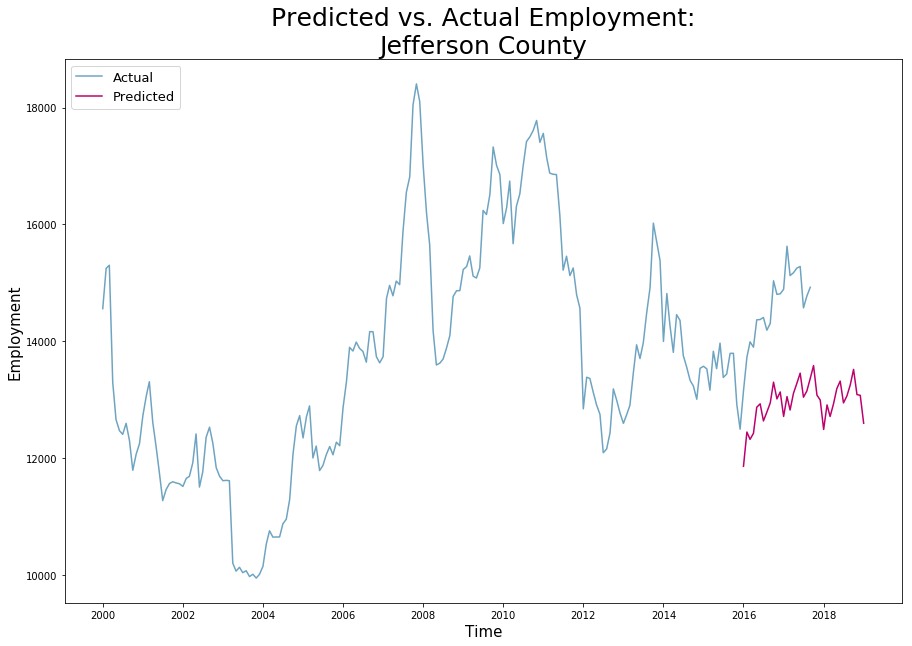

In [18]:
# Running an ARIMA model to predict post-Harvey employment
model = SARIMAX(pre_jefferson,
                order=(1,0,0),
               seasonal_order=(1,1,1,12))
sarima = model.fit()
preds_post_jefferson = sarima.predict(start='2016', end='2019')

plot_preds(jefferson, preds_post_jefferson, 'Jefferson County', 'Employment');

## Orange County

In [19]:
pre_orange = orange['2001':'2015']
post_orange = orange['2016':]

In [20]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(pre_orange['employment']))

Test Statistic   -1.453173
p-value           0.556536
dtype: float64

In [21]:
# Iterate through all possible differences.
for d in range(1, len(pre_jefferson['employment'])):
    if interpret_dftest(adfuller(pre_jefferson['employment'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=1 yields a stationary time series


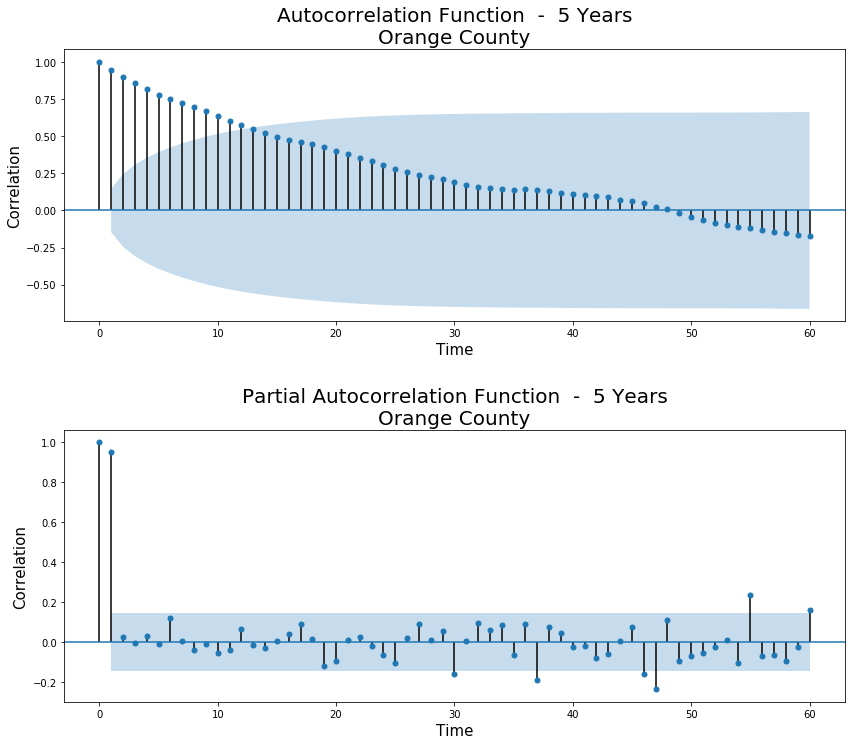

In [22]:
plot_acf_pacf(pre_orange, 60, '5 Years', 'Orange County')

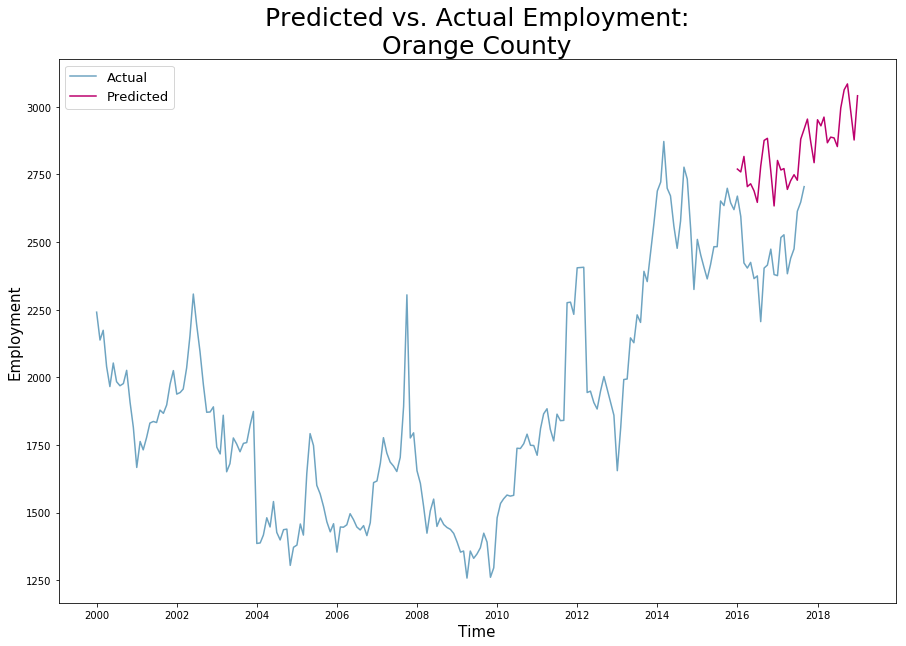

In [23]:
# Running an ARIMA model to predict post-Harvey employment
model = SARIMAX(pre_orange,
                order=(1,1,0),
               seasonal_order=(1,1,0,12))
sarima = model.fit()
preds_post_orange = sarima.predict(start='2016', end='2019')

plot_preds(orange, preds_post_orange, 'Orange County', 'Employment');